------------

-------------

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math
import seaborn as sns
from scipy import stats as st





## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

print(df_plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los datos de tarifas se ven bien a simple vista, sin embargo estos van a ser enriquecidos con el cálculo de los gb por mes que están incluidos en la tarifa para facilitar los cálculos posteriores, esto se realizará dividiendo el número mb por 1000 (conversión genérica de que 1 gb son 1000 mb)

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
# No hay correcciones

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included']/1024
print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Imprime una muestra de datos para usuarios

print(df_users.head(10))

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate         NaN  
1  2018-08-13      surf         

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se observa principalmente en la columna churn_date una gran cantidad de valores ausentes, debido a que corresponde a la fecha en la que el usuario dejó el servicio, por lo tanto quienes aún utilizaban el servicio se les asignó el dato NaN, esto se puede solucionar reemplazando los valores ausentes por unknow o cualquier otra palabra que ayude a identificarlos.

Ambas columnas asociadas a fechas deben ser convertidas de object a datetime para facilitar el acceso a los datos y poder estudiar el comportamiento por mes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
df_users['churn_date'].fillna('unknow', inplace= True)
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users.columns = ['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan_name', 'churn_date']
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan_name   500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
print(df_calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Al igual que en dataframe anterior los datos asociados a fechas fueron convertidos de object a datetime, además para eriquecer estos datos se extrajo en dato del mes en una columna extra que facilitará la reclasificación de datos.

Por otro lado atendiendo a lo descrito en las tarifas se aproximó al siguiente entero la duración en minutos de las llamadas.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:

df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [13]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls['duration'] = np.ceil(df_calls['duration'])

## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
# Imprime una muestra de datos para los mensajes

print(df_messages.head(10))

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Las fechas fueron modificadas desde object a datetime y además se creo una nueva columna que contenga el mes.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
df_messages['month'] = df_messages['message_date'].dt.month


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
# Imprime una muestra de datos para el tráfico de internet

print(df_internet.head(10))

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Los datos asociados a fechas fueron convertidos desde object a datetime y se creó una nueva columna que almacena el mes. Además se convirtieron los mb utilizados a gb(conversión genérica de 1gb = 1000 mb) obedeciendo a lo planteado en las tarifas. Por último se aproximó el consumo de gb mensuales al siguiente número entero.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format= '%Y-%m-%d')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
df_internet['month'] = df_internet['session_date'].dt.month


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user= df_calls.groupby(['user_id', 'month'])['duration'].count().reset_index()

print(calls_per_user)

      user_id  month  duration
0        1000     12        16
1        1001      8        27
2        1001      9        49
3        1001     10        65
4        1001     11        64
...       ...    ...       ...
2253     1498     12        39
2254     1499      9        41
2255     1499     10        53
2256     1499     11        45
2257     1499     12        65

[2258 rows x 3 columns]


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
min_per_user = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
print(min_per_user)


      user_id  month  duration
0        1000     12     124.0
1        1001      8     182.0
2        1001      9     315.0
3        1001     10     393.0
4        1001     11     426.0
...       ...    ...       ...
2253     1498     12     339.0
2254     1499      9     346.0
2255     1499     10     385.0
2256     1499     11     308.0
2257     1499     12     496.0

[2258 rows x 3 columns]


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
msg_per_user = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index()
print(msg_per_user)



      user_id  month  id
0        1000     12  11
1        1001      8  30
2        1001      9  44
3        1001     10  53
4        1001     11  36
...       ...    ...  ..
1801     1496      9  21
1802     1496     10  18
1803     1496     11  13
1804     1496     12  11
1805     1497     12  50

[1806 rows x 3 columns]


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

internet_per_user = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_per_user['gb_used'] = (internet_per_user['mb_used']/1024).apply(np.ceil)
print(internet_per_user)


      user_id  month   mb_used  gb_used
0        1000     12   1901.47      2.0
1        1001      8   6919.15      7.0
2        1001      9  13314.82     14.0
3        1001     10  22330.49     22.0
4        1001     11  18504.30     19.0
...       ...    ...       ...      ...
2272     1498     12  23137.69     23.0
2273     1499      9  12984.76     13.0
2274     1499     10  19492.43     20.0
2275     1499     11  16813.83     17.0
2276     1499     12  22059.21     22.0

[2277 rows x 4 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
total_data_month = calls_per_user.merge(right=min_per_user, on= ['user_id', 'month'], how='outer')
total_data_month = total_data_month.merge(right=msg_per_user, on= ['user_id', 'month'], how='outer')
total_data_month = total_data_month.merge(right=internet_per_user, on= ['user_id', 'month'], how='outer')
total_data_month.columns = ['user_id', 'month', 'messages', 'duration', 'calls','mb_used', 'gb_used']
total_data_month.reset_index()

print(total_data_month.head(10))


   user_id  month  messages  duration  calls   mb_used  gb_used
0     1000     12      16.0     124.0   11.0   1901.47      2.0
1     1001      8      27.0     182.0   30.0   6919.15      7.0
2     1001      9      49.0     315.0   44.0  13314.82     14.0
3     1001     10      65.0     393.0   53.0  22330.49     22.0
4     1001     11      64.0     426.0   36.0  18504.30     19.0
5     1001     12      56.0     412.0   44.0  19369.18     19.0
6     1002     10      11.0      59.0   15.0   6552.01      7.0
7     1002     11      55.0     386.0   32.0  19345.08     19.0
8     1002     12      47.0     384.0   41.0  14396.24     15.0
9     1003     12     149.0    1104.0   50.0  27044.14     27.0


In [28]:
# Añade la información de la tarifa
total_data = pd.merge(total_data_month, df_users[['user_id', 'plan_name']], on='user_id')
total_data = pd.merge(total_data, df_plans, on= 'plan_name')
total_data = total_data.sort_values(by='user_id').reset_index(drop=True)
print(total_data.head())

   user_id  month  messages  duration  calls   mb_used  gb_used plan_name  \
0     1000     12      16.0     124.0   11.0   1901.47      2.0  ultimate   
1     1001     11      64.0     426.0   36.0  18504.30     19.0      surf   
2     1001     12      56.0     412.0   44.0  19369.18     19.0      surf   
3     1001     10      65.0     393.0   53.0  22330.49     22.0      surf   
4     1001      8      27.0     182.0   30.0   6919.15      7.0      surf   

   messages_included  mb_per_month_included  minutes_included  \
0               1000                  30720              3000   
1                 50                  15360               500   
2                 50                  15360               500   
3                 50                  15360               500   
4                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  \
0               70           7             0.01            0.01   
1           

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [29]:
# Calcula el ingreso mensual para cada usuario
def ingresos_mensuales(col):
    
# definir columna de uso de servicios
    minutes = col['duration']
    internet = col['gb_used']
    messages = col['messages']
    
# definir limite de uso.
    lim_minutes = col['minutes_included']
    lim_internet = col['gb_per_month_included'] 
    lim_messages = col['messages_included']

# tarifas
    month_rate = col['usd_monthly_pay']
    internet_rate = col['usd_per_gb']
    message_rate = col['usd_per_message']
    minute_rate = col['usd_per_minute']

# inicializar variables
    internet_use = 0
    min_use = 0
    message_use = 0

    if minutes > lim_minutes:
        min_use = (minutes - lim_minutes) * minute_rate
    if messages > lim_messages:
        message_use =  (messages - lim_messages) * message_rate
    if internet > lim_internet:
        internet_use = (internet - lim_internet) * internet_rate
    ingresos = month_rate + internet_use + min_use + message_use
    return ingresos


In [30]:
total_data['ingresos'] = total_data.apply(ingresos_mensuales, axis=1)
print(total_data.head(15))

    user_id  month  messages  duration  calls   mb_used  gb_used plan_name  \
0      1000     12      16.0     124.0   11.0   1901.47      2.0  ultimate   
1      1001     11      64.0     426.0   36.0  18504.30     19.0      surf   
2      1001     12      56.0     412.0   44.0  19369.18     19.0      surf   
3      1001     10      65.0     393.0   53.0  22330.49     22.0      surf   
4      1001      8      27.0     182.0   30.0   6919.15      7.0      surf   
5      1001      9      49.0     315.0   44.0  13314.82     14.0      surf   
6      1002     12      47.0     384.0   41.0  14396.24     15.0      surf   
7      1002     11      55.0     386.0   32.0  19345.08     19.0      surf   
8      1002     10      11.0      59.0   15.0   6552.01      7.0      surf   
9      1003     12     149.0    1104.0   50.0  27044.14     27.0      surf   
10     1004     10      61.0     365.0   24.0  14541.63     15.0      surf   
11     1004      7      49.0     381.0   26.0  24516.62     24.0

## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

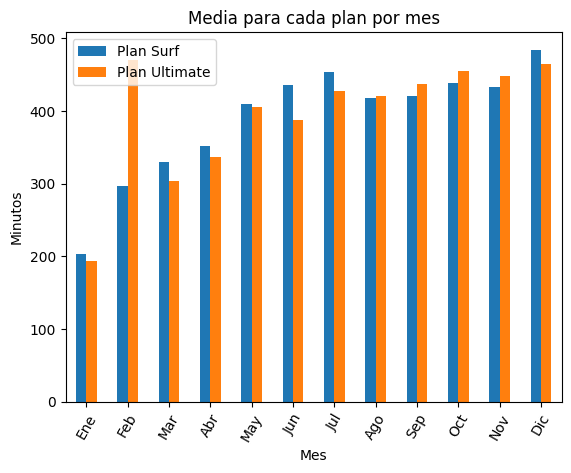

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
total_data_g1 = total_data.sort_values(by='month')
etiquetas_x = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
surf_mean = total_data_g1[total_data_g1['plan_name'] == 'surf'].groupby('month')['duration'].mean()
ultimate_mean = total_data_g1[total_data_g1['plan_name']== 'ultimate'].groupby('month')['duration'].mean()
duration_mean = pd.merge(surf_mean, ultimate_mean, on='month').plot(kind='bar', ylabel='Minutos', xlabel='Mes', title='Media para cada plan por mes',rot=60)
plt.xticks(np.arange(len(etiquetas_x)), etiquetas_x)
plt.legend(['Plan Surf', 'Plan Ultimate'])

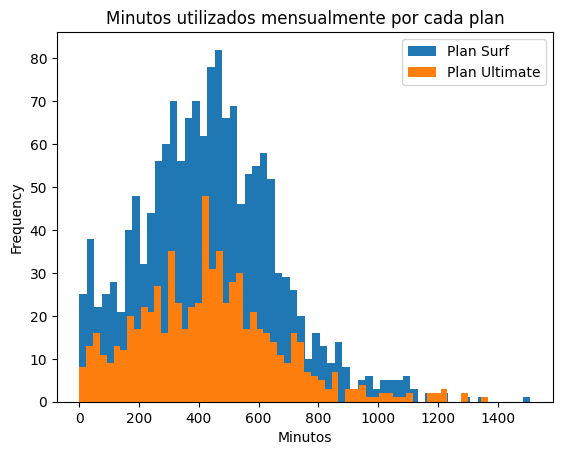

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
surf_min = total_data[total_data['plan_name'] == 'surf']['duration'].plot(kind='hist', label='Plan Surf', bins=60)
ultimate_min = total_data[total_data['plan_name']== 'ultimate']['duration'].plot(kind='hist', label = 'Plan Ultimate', bins=60)
plt.title('Minutos utilizados mensualmente por cada plan')
plt.xlabel('Minutos')
plt.legend()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [33]:
#Calcula la media y la varianza de la duración mensual de llamadas.
#Plan surf.
surf_calls = total_data[total_data['plan_name'] == 'surf'].groupby('user_id')['duration'].mean()

#Plan ultimate.

ultimate_calls = total_data[total_data['plan_name'] == 'ultimate'].groupby('user_id')['duration'].mean()

print('La media para el plan surf es', surf_calls.mean())
print('La varianza para el plan surf es', surf_calls.var())
print('La media para el plan ultimate es', ultimate_calls.mean())
print('La varianza para el plan ultimate es', ultimate_calls.var())

La media para el plan surf es 417.66637186943933
La varianza para el plan surf es 36915.05980962302
La media para el plan ultimate es 414.66419052273886
La varianza para el plan ultimate es 38127.807940911465


Text(0.5, 1.0, 'Distribución mensual de llamadas')

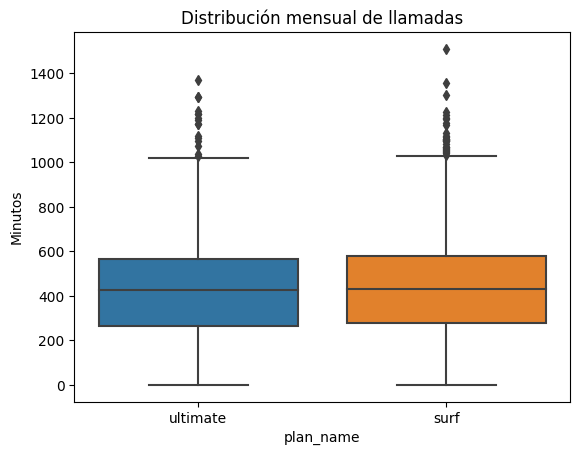

In [34]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data=total_data, x='plan_name', y='duration')
plt.ylabel('Minutos')
plt.title('Distribución mensual de llamadas')


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

De acuerdo al análisis realizado los usuarios de ambos planes tienen una media similar de minutos utilizados mensuales con 417 minutos para el plan surf y 414 minutos para el plan ultimate, lo que sugiere que no hay grandes diferencias en el comportamiento ya que ambos ocupan menos minutos de los establecidos para cada plan.

LLama la atención que durante el mes de febrero los minutos utilizados por los usuarios del plan ultimate fueron visiblemente mayores al plan surf, una explicación a esto puede ser alguna festividad asociada, sin embargo durante el resto de los meses ambos planes se muestran bastante parejos.


Desde el punto de vista de distribución ambos presentan una de tipo normal y se puede apreciar que los clientes asociados al plan surf representan una mayor cantidad que los asociados al plan ultimate, aunque esto no puede comprobarse y solo se puede asociar a una tendencia ya que estamos trabajando con una muestra del universo total de clientes, pero independientemente de esto podemos observar que la mayor frecuencia de llamadas se concentra entre los 400 a 450 minutos.


### Mensajes

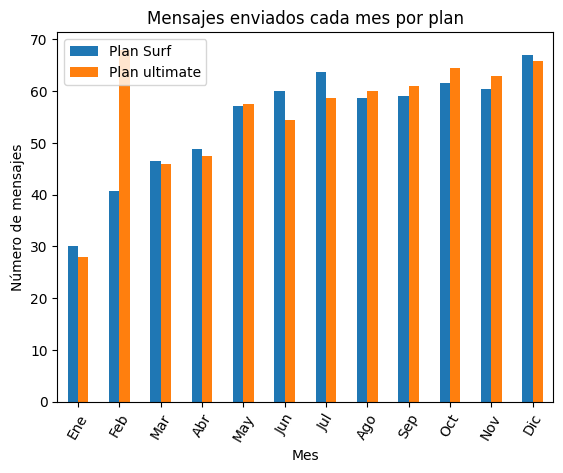

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
msg_surf = total_data_g1[total_data_g1['plan_name'] == 'surf'].groupby('month')['messages'].mean()
msg_ultimate = total_data_g1[total_data_g1['plan_name'] == 'ultimate'].groupby('month')['messages'].mean()
msg_mean = pd.merge(msg_surf, msg_ultimate, on='month').plot(kind='bar', xlabel='Mes', ylabel='Número de mensajes', rot=60, title='Mensajes enviados cada mes por plan')
plt.xticks(np.arange(len(etiquetas_x)), etiquetas_x)
plt.legend(['Plan Surf', 'Plan ultimate'])

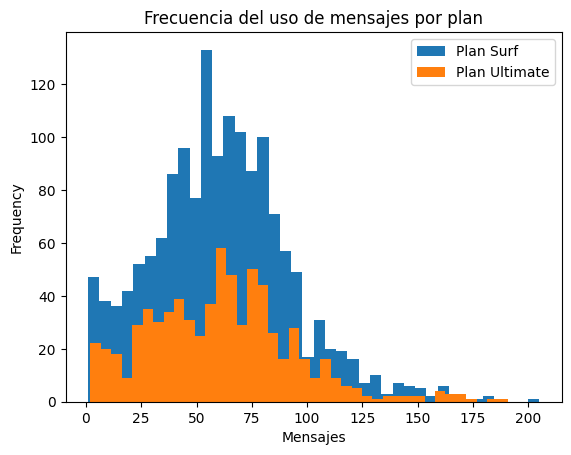

In [36]:
msg_surf_hist = total_data_g1[total_data_g1['plan_name'] == 'surf']['messages'].plot(kind='hist', bins=40, label='Plan Surf')
msg_ultimate_hist = total_data_g1[total_data_g1['plan_name'] == 'ultimate']['messages'].plot(kind='hist', bins=40, label='Plan Ultimate')
plt.xlabel('Mensajes')
plt.title('Frecuencia del uso de mensajes por plan')
plt.legend()

In [37]:
#Calculo de media y varianza
#Plan surf
surf_messages = total_data[total_data['plan_name'] == 'surf'].groupby('user_id')['messages'].mean()

#Plan Ultimate
ultimate_messages = total_data[total_data['plan_name'] == 'ultimate'].groupby('user_id')['messages'].mean()

print('La media para los mensajes del plan surf es', surf_messages.mean())
print('La varianza para los mensajes del plan surf es', surf_messages.var())
print('La media para los mensajes del plan ultimate es', ultimate_messages.mean())
print('La varianza para los mensajes del plan ultimate es', ultimate_messages.var())

La media para los mensajes del plan surf es 58.12055281119699
La varianza para los mensajes del plan surf es 684.7255179191466
La media para los mensajes del plan ultimate es 58.43942535958665
La varianza para los mensajes del plan ultimate es 735.977820711805


Text(0.5, 1.0, 'Distribución de mensajes por plan')

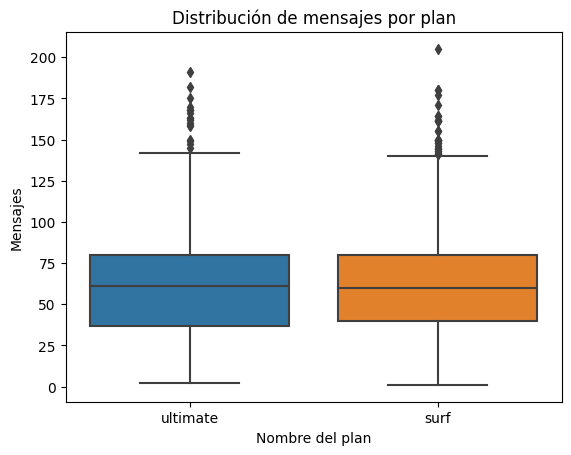

In [38]:
sns.boxplot(data=total_data, x='plan_name', y='messages')
plt.ylabel('Mensajes')
plt.xlabel('Nombre del plan')
plt.title('Distribución de mensajes por plan')

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Al igual que ocurre con las llamadas no se aprecian diferencias visibles entre ambos planes ya que ambos presentan medias de 58 mensajes mensuales por usuario, sin embargo aquí se destaca que los usuarios del plan surf estarían sobrepasando en promedio el límite de mensajes que su plan otorga (50 sms por mes) y por lo tanto estarían pagando extra por enviar mensajes.

LLama la atención que se repite el mismo comportamiento que en las llamadas para el plan ultimate donde se genera un aumento notorio del número de mensajes respecto al plan surf durante el mes de febrero, al igual que en la situación anterior esto podría deberse a una festividad asociada a ese mes.


### Internet

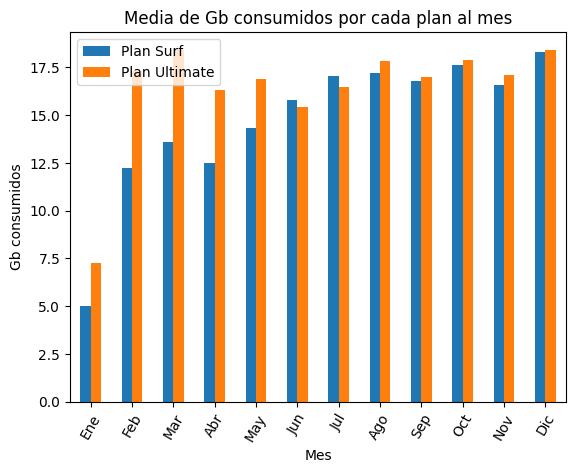

In [39]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
#Surf Internet
surf_internet = total_data_g1[total_data_g1['plan_name'] == 'surf'].groupby('month')['gb_used'].mean()

#Ultimate internet
ultimate_internet = total_data_g1[total_data_g1['plan_name'] == 'ultimate'].groupby('month')['gb_used'].mean()

used_internet = pd.merge(surf_internet, ultimate_internet, on ='month').plot(kind='bar', rot=60, xlabel='Mes', ylabel='Gb consumidos', title='Media de Gb consumidos por cada plan al mes')
plt.xticks(np.arange(len(etiquetas_x)), etiquetas_x)
plt.legend(['Plan Surf', 'Plan Ultimate'])

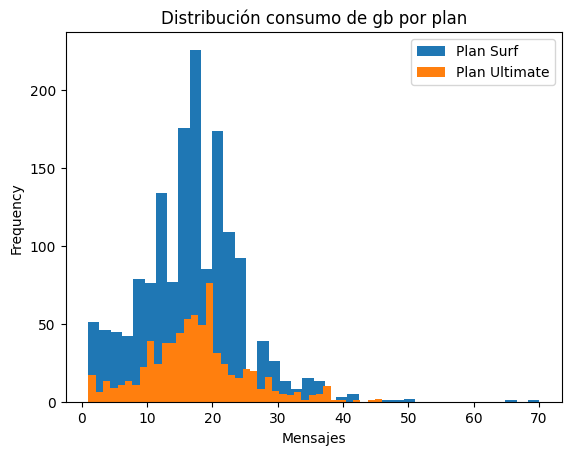

In [40]:
internet_hist_surf = total_data[total_data['plan_name'] == 'surf']['gb_used'].plot(kind='hist', bins=40, label='Plan Surf')
internet_hist_ultimate = total_data[total_data['plan_name'] == 'ultimate']['gb_used'].plot(kind='hist', bins=40, label='Plan Ultimate')
plt.xlabel('Mensajes')
plt.title('Distribución consumo de gb por plan')
plt.legend()

In [41]:
#Media y varianza para tráfico de internet
#Plan surf
internet_surf = total_data[total_data['plan_name'] == 'surf'].groupby('user_id')['gb_used'].mean()

#Plan Ultimate
internet_ultimate = total_data[total_data['plan_name'] == 'ultimate'].groupby('user_id')['gb_used'].mean()


print('La media para el tráfico de internet del plan surf es', internet_surf.mean())
print('La varianza para el tráfico de internet del plan ultimate es', internet_surf.var())
print('La media para el tráfico de internet del plan ultimate es', internet_ultimate.mean())
print('La varianza para el tráfico de internet del plan ultimate es', internet_ultimate.var())

La media para el tráfico de internet del plan surf es 16.09454604130809
La varianza para el tráfico de internet del plan ultimate es 36.17303587928459
La media para el tráfico de internet del plan ultimate es 16.177140145770718
La varianza para el tráfico de internet del plan ultimate es 33.10305799915333


Text(0.5, 1.0, 'Distribución de consumo de GB por plan')

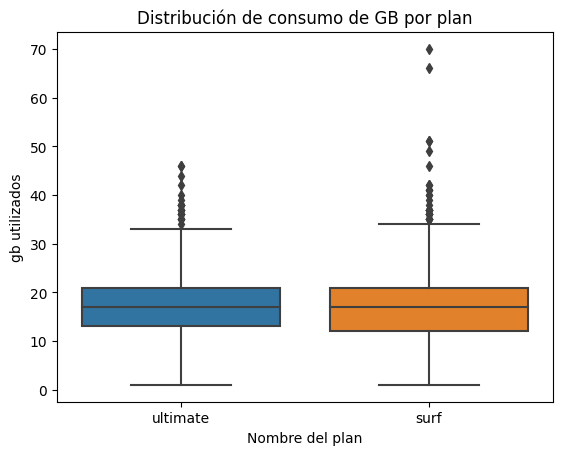

In [42]:
sns.boxplot(data=total_data, x='plan_name', y='gb_used')
plt.ylabel('gb utilizados')
plt.xlabel('Nombre del plan')
plt.title('Distribución de consumo de GB por plan')

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

Los usuarios de ambos planes muestran medias similares en lo que respecta a los gb utilizados mensualmente con 16 gb para el plan surf y 16 gb para el plan ultimate. Los clientes del plan surf están consumiendo en promedio 1 gb más que el límite de su plan (15gb) al mes lo cual puede traducirse en en un aumento promedio de 7 usd en sus tarifas.

Durante los meses de febrero, marzo y abril los usuarios del plan ultimate mostraron una notable diferencia, con tendencia al aumento, en el consumo de internet respecto al plan surf, sin embargo en promedio no sobrepasaron el límite de su plan (50gb)

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

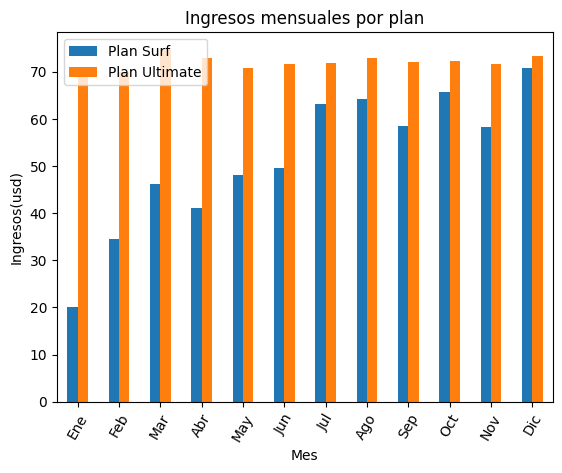

In [43]:
#Ingresos por plan surf
ingresos_surf = total_data_g1[total_data_g1['plan_name'] == 'surf'].groupby('month')['ingresos'].mean()
ingresos_ultimate = total_data_g1[total_data_g1['plan_name'] == 'ultimate'].groupby('month')['ingresos'].mean()
ingresos_mes = pd.merge(ingresos_surf, ingresos_ultimate, on='month').plot(kind='bar', xlabel='Mes', ylabel='Ingresos(usd)', title='Ingresos mensuales por plan', rot=60)
plt.xticks(np.arange(len(etiquetas_x)), etiquetas_x)
plt.legend(['Plan Surf', 'Plan Ultimate'])

Text(0.5, 0, 'Ingresos(usd)')

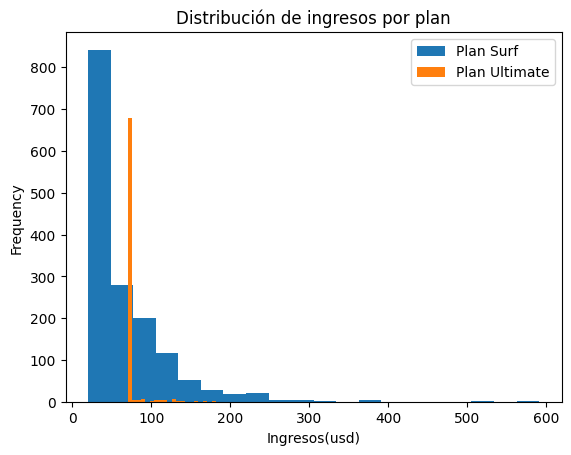

In [44]:
ingresos_hist_surf = total_data[total_data['plan_name'] == 'surf']['ingresos'].plot(kind='hist', bins=20, label='Plan Surf')
ingresos_hist_ultimate = total_data[total_data['plan_name'] == 'ultimate']['ingresos'].plot(kind='hist', bins=20, label='Plan Ultimate')
plt.title('Distribución de ingresos por plan')
plt.legend()
plt.xlabel('Ingresos(usd)')

In [45]:
#Media y varianza para ingresos
#Plan Surf
ingresos_surf = total_data[total_data['plan_name'] == 'surf'].groupby('user_id')['ingresos'].mean()

#Plan Ultimate
ingresos_ultimate = total_data[total_data['plan_name'] == 'ultimate'].groupby('user_id')['ingresos'].mean()

print('La media de ingresos para el plan surf es', ingresos_surf.mean())
print('La varianza para los ingresos del plan surf es', ingresos_surf.var())
print('La media de ingresos para el plan ultimate es', ingresos_ultimate.mean())
print('La varianza para los ingresos del plan ultimate es', ingresos_ultimate.var())

La media de ingresos para el plan surf es 58.46818531735199
La varianza para los ingresos del plan surf es 1904.9789758435566
La media de ingresos para el plan ultimate es 71.82328379334749
La varianza para los ingresos del plan ultimate es 55.12714659851139


Text(0.5, 0, 'Nombre del plan')

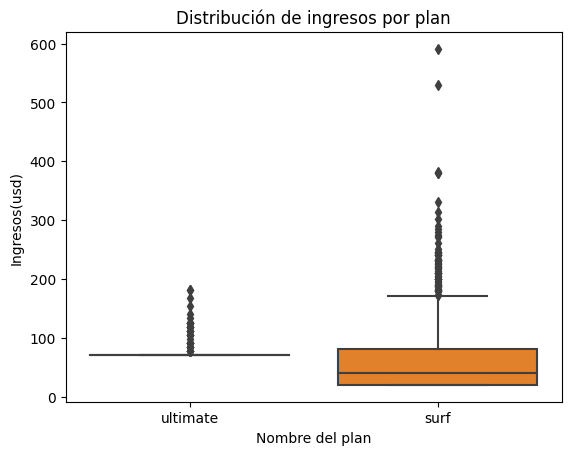

In [46]:
sns.boxplot(data=total_data, x='plan_name', y='ingresos')
plt.title('Distribución de ingresos por plan')
plt.ylabel('Ingresos(usd)')
plt.xlabel('Nombre del plan')

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

La media de ingresos para el plan surf fue de 58 usd y la del plan ultimate 71 usd, esto indica que los usuarios del plan surf pagan  en promedio alrededor del triple del costo de su plan en servicos adicionales, sin embargo los del plan ultimate solo invierten 1 usd extra mensual en promedio.
En relación a los hábitos de consumo de internet en el año se observa que duarnte los primeros meses del año (enero y febrero), los usuarios no tienden a adquirir tantos servicios extras como en los siguientes meses, lo cual se evidencia en una notoria baja en los ingresos para este plan.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

La hipótesis nula para este caso sería que no existen diferencia significativas ente el promedio de ingresos generados por ambos planes.

La hipótesis alternativa basados en los datos obtenidos antiormente sugiere que si hay diferencias significativas entre el promedio de ingreso generado por ambos planes.

In [50]:
# Prueba las hipótesis
alpha = 0.05
surf_plan = total_data[total_data['plan_name'] == 'surf'].groupby('user_id')['ingresos'].mean()
ultimate_plan = total_data[total_data['plan_name'] == 'ultimate'].groupby('user_id')['ingresos'].mean()

prueba_de_hipotesis = st.ttest_ind(surf_plan, ultimate_plan, equal_var=False)
print('valor p:', prueba_de_hipotesis.pvalue)

if prueba_de_hipotesis.pvalue < alpha:
    print('Rechazamos hipótesis nula')
else:
    print('No podemos rechazar hipótesis nula')
    



valor p: 1.0759495705425591e-07
Rechazamos hipótesis nula


In [48]:
Para realizar la prueba de hipótesis se asigno un alpha de 0,05 y se usó la prueba de t student comparando
la media de los ingresos para ambos planes, la varianza se fijo en False ya que las varianzas para ambos dataset 
no son iguales.
El rechazo de la hipótesis nula significa que si hay diferencias estadísticamente significativas entre
los ingresos para ambos planes.

SyntaxError: invalid syntax (2591875787.py, line 1)

[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]
Hipótesis nula : El ingreso promedio de los ususarios de NY-NJ no es diferente estadísticamente de los usuarios de otras áreas.
Hipótesis alternativa: El ingreso promedio de los usuarios de NY-NJ es estadísticamente diferente al de los usuarios de otras áreas.


In [49]:
# Prueba las hipótesis
alpha=0.05
# Combinar la información necesaria en 1 dataframe
data_1 = total_data[['user_id', 'ingresos']]
data_2 = df_users[['user_id', 'city']]
merge_data = pd.merge(data_1, data_2, on='user_id')


area = merge_data[merge_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
no_area = merge_data[merge_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

area_ingresos = area.groupby('user_id')['ingresos'].mean()
no_area_ingresos = no_area.groupby('user_id')['ingresos'].mean()

hipotesis = st.ttest_ind(area_ingresos, no_area_ingresos, equal_var=False)
print('valor p:', hipotesis.pvalue)

if hipotesis.pvalue < alpha:
    print('Rechazamos hipótesis nula')
else:
    print('No podemos rechazar hipótesis nula')

valor p: 0.455753792085725
No podemos rechazar hipótesis nula


In [ ]:
Para realizar el análisis se fijó el alpha en 0,05 y se filtraron los datos para la ciudad NY-NJ y
el resto de las ciudades, luego se calculó las medias de sus ingresos y se compararon mediante t student
asumiendo que las varinzas para los distintos set de datos eran diferentes.
De esto se obtuvo que la hipótesis nula no podía ser rechazada, lo cual indica que no hay diferencias
estadísticamente significtivas ente NY-NJ y las otras ciudades.
    

## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

De la estructura general de los datos se puede concluir que la modificación de las fechas desde object a datetime juega un papel crucial en el análisis de los datos, además enriquecerlos creando una columna exclusiva para el mes facilita la visualización del comportamiento de los usuarios a través de los meses. De igual manera la conversión de los datos de mb a gb desde el dataframe con los datos mensuales para cada usuario simplificó los cálculos y comparaciones con los límites de los paquetes asociados a cada plan.Por último el aproximar al siguiente entero siguiendo los lineamientos de cada plan evitó confusiones al calcular costos asociados y los pagos por servicios extras.

En relación al comportamiento de los ususarios de ambos planes podemos conlcuir que tanto para el parámetro llamadas, mensajes y gb las medias se mantienen bastante similares, sin embargo al comparar con los límites asociados a cada plan se observa que los usuarios de plan surf tienden a sobrepasarlos en lo que respecta a mensajes y gb. Respecto a la tendencia a lo largo de los meses no se observa un comportamiento lineal ni predecible, solo podemos decir que durante febrero y marzo los clientes del plan ultimate tendieron a ocupar más minutos de llamada, mensajes y gb que los del plan surf.

Los ingresos asociados a cada plan evidencia que los ususarios del plan surf tienden a pagar en promedio hasta el triple de su tarifa al adquirir servicios de mensajeria e internet extras en contraposición a los ususarios del plan ultimate que no suelen superar los límites de su plan y en promedio llegarian a pagar un extra de 1usd.

En relación a los resultados de la ciudad NY-NJ se pude establecer que  estadísticamente no presenta diferencias frente al resto de las ciudades en cuanto a ingresos, sin embargo esto no resta la posibilidad de que hayan ciudades que si, lo cual sería interesante de analizar, ya que podría sugerir en que ciudades es más conveniente ofrecer cierto tipo de planes.

En conclusión podemos decir que pese a que la muestra posee una mayor cantidad de datos asociados al plan surf, se evidenció que el plan ultimate registra mayor cantidad de ingresos promedio por usuario y estos no tienden a superar los límites de su plan como los usuarios del plan surf, por lo que para la empresa sería una buena opción ofrecer a los usuarios del plan surf que sobrepansan cierta cantidad de cobros por servicios extra , cambiarse de plan